In [65]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
#import sys
#print(sys.executable)

In [66]:
def authenticate():
    consumer_key = 'VRDK1GvONXQTiRWoc3Y5Nmkyv'
    consumer_secret = 'uoKyZaMtxKQRAZfmTbWjP2T4I2vBWgoKbmoSSZn585Mk4uCwpv'
    access_token = '1649440446580510720-AjcmXC6q4MF5Qw7y9lkARAXhTRjG3p'
    access_secret = 'VDtwSFyhgdtb71aTBUJ9sEJ492dyJX2RBfkzmqIQFDOsr'
    
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    api = tweepy.API(auth)
    return api

In [67]:
def get_tweets(api, topic, count=10):
    tweets = []
    for tweet in tweepy.Cursor(api.search_tweets, q=topic, lang='en').items(count):
        tweets.append(tweet.text)
    return tweets

In [68]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity


In [69]:
def plot_sentiment_scores(scores):
    plt.hist(scores, bins=10)
    plt.title('Sentiment Scores')
    plt.xlabel('Polarity')
    plt.ylabel('Count')
    plt.savefig('sentiment_scores.png')
    plt.show()

In [70]:
def main():
    api = authenticate()
    topic = input('Enter a topic to search for: ')
    count = int(input('Enter the number of tweets to analyze: '))
    
    tweets = get_tweets(api, topic, count)
    scores = []
    for tweet in tweets:
        score = analyze_sentiment(tweet)
        scores.append(score)
        print(tweet)
        print('Sentiment score:', score)
        print()
    
    plot_sentiment_scores(scores)
    
    # Add image description
    print('Sentiment score histogram:')
    print('-------------------------')
    print('Polarity score ranges from -1 (very negative) to 1 (very positive).')

Enter a topic to search for: nature and race
Enter the number of tweets to analyze: 10
@CBI8400 @LeodiusD @Nature_and_Race You’re only making the Nazi’s grand strategy look even less competent. 

What’s… https://t.co/LMpB2isnWJ
Sentiment score: 0.20833333333333334

@real_griffitsu @Nature_and_Race doubt he even broke TOS, tho. 😤 N&amp;R didn't exactly go around fedposting, or the li… https://t.co/1sUF5tRTxw
Sentiment score: 0.25

@elonmusk689 @NotWoke0 @joe76228137 @thfcmxtt @Nature_and_Race I guess you already know.
But hey, you won't admit i… https://t.co/MmyK0450HJ
Sentiment score: 0.0

@tboomjunkie @pepesilvia2028 @Nature_and_Race Well my family is Georgian/Turkish/abkhazian /do someone gives a shit… https://t.co/cubLfAlnil
Sentiment score: 0.0

@StrawberryEclir @TheFellaEnto @Nature_and_Race Russians are not white
Sentiment score: 0.0

RT @berserkir_088: @GodLovesYou2000 @Nature_and_Race @giddyuplilone Uh oh. Time for you to shake off all those jew lies you've been gorging…
Sentim

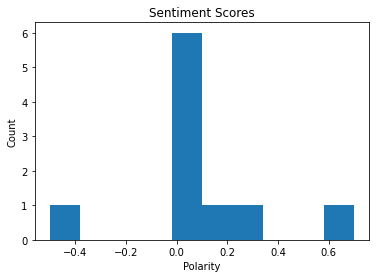

Sentiment score histogram:
-------------------------
Polarity score ranges from -1 (very negative) to 1 (very positive).


In [71]:
main()